In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [17]:
#read data
train_data = pd.read_csv('train.csv')
new_train_data = pd.read_csv('new_train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv("sample_submission.csv")

In [18]:
print("Training data size",train_data.shape)
print('New training data size',new_train_data.shape)
print("test data size",test_data.shape)
submission.head()

Training data size (1225029, 3)
New training data size (250810, 4)
test data size (117703, 2)


,id,landmarks
0,000088da12d664db,8815 0.03
1,0001623c6d808702,7249 0.61
2,0001bbb682d45002,5328 0.5
3,0002362830cfe3a3,4188 0.96
4,000270c9100de789,10506 0.82


In [19]:
train_data.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [20]:
new_train_data.drop('Unnamed: 0', axis=1, inplace=True)
new_train_data.head()

,id,url,landmark_id
0,775f9f71f0eb2300,https://lh3.googleusercontent.com/-dBd90XSEK_s...,4638
1,48cfe8e287326153,https://lh5.googleusercontent.com/-pGiva-OhD_Y...,11139
2,eb9817a6d8f31d6a,http://lh5.ggpht.com/-iZ-llS7AlaY/SIwzn_zZU5I/...,6051
3,38f6b5ee91b46361,http://lh4.ggpht.com/-9WtalDcCZsU/RfKTGvQzSuI/...,12571
4,1aebc94ed4be585f,http://mw2.google.com/mw-panoramio/photos/medi...,5754


In [33]:
#number of classes
len(train_data['landmark_id'].value_counts())

14951

In [32]:
#number of classes after selection
len(new_train_data['landmark_id'].value_counts())

14951

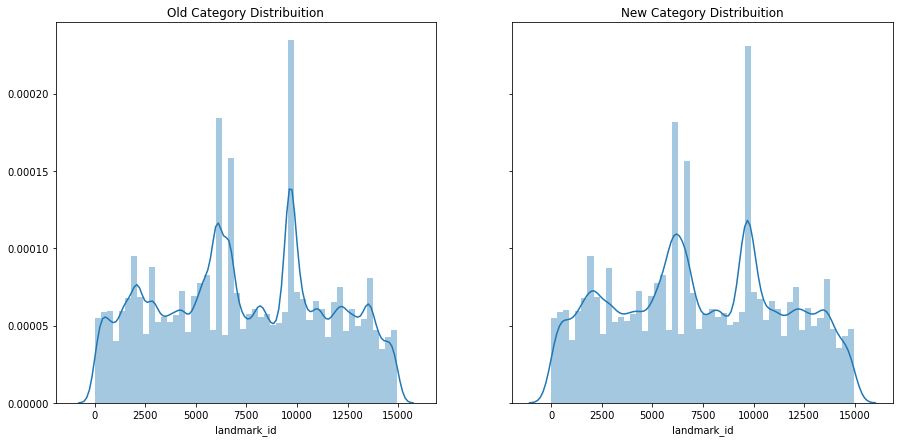

In [40]:
f, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize = (15, 7))

ax[0].set_title('Old Category Distribuition')
ax[1].set_title('New Category Distribuition')
sns.distplot(train_data['landmark_id'], ax=ax[0])
sns.distplot(new_train_data['landmark_id'], ax=ax[1])

plt.show()

In [82]:
#url examples
urls.values[:2]

array(['http://lh3.ggpht.com/-Urz7MkJrk8I/SPJNveofYrI/AAAAAAAAAqo/lRlO6lTSuQo/s1600/',
       'https://lh3.googleusercontent.com/-AuNF1SMiiPw/S312N3ZuW_I/AAAAAAAAB8M/2uibeFFfpG8/rj/'],
      dtype=object)

In [87]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 300px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [88]:
#examples from the random category
category = new_train_data['landmark_id'].value_counts().keys()[0]
urls = new_train_data[new_train_data['landmark_id'] == category]['url']
display_category(urls, "")

In [74]:
urls.head(12).values[0]

'http://lh3.ggpht.com/-Urz7MkJrk8I/SPJNveofYrI/AAAAAAAAAqo/lRlO6lTSuQo/s1600/'

In [75]:
#images in different quality
img_style = "width: 480px; margin: 0px; float: left; border: 1px solid black;"
images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for u in [urls.values[0], urls.head(12).values[0][:-6]+'s640/']])

display(HTML(images_list))

In [76]:
img_style = "width: 480px; margin: 0px; float: left; border: 1px solid black;"
images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for u in [urls.values[0], urls.head(12).values[0][:-6]+'s320/']])

display(HTML(images_list))

In [80]:
img_style = "width: 480px; margin: 0px; float: left; border: 1px solid black;"
images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for u in [urls.values[0], urls.values[0][:-6]+'s128/']])

display(HTML(images_list))